*   ベースディレクトリと、出力ディレクトリを設定します。

In [ ]:
############################################
BaseDir      = 'IntroDDSJpn/Chap01/'
OutputDir    = '1Error-0105Histogram/'
FileBaseName = '1Error-0105Histogram'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [ ]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

Mounted at /content/drive
ipynb file path = drive/My Drive/Colab Notebooks/IntroDDS/Chap01/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
import sklearn as skl
print('sklearn    Ver.', skl.__version__)
#
############################################
import pandas as pd
print('pandas     Ver.', pd.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.8.0
numpy      Ver. 1.26.4
sklearn    Ver. 1.5.2
pandas     Ver. 2.2.2
FilePath = drive/My Drive/Colab Notebooks/IntroDDS/Chap01/1Error-0105Histogram/
 drive/My Drive/Colab Notebooks/IntroDDS/Chap01/1Error-0105Histogram/ is exist.


# 1.1.5 測定値の分布(ヒストグラム)
> まずヒストグラムを描く関数を定義する。

In [4]:
############################################
def GrfHist( data, bins_conf, y_label='Distribution', x_label=r'$x$', y_max=None, hist_label=None, title=None, color='white', edgecolor='black', vline_sigma=True ):
    #
    # 平均値と標準偏差
    data_mean_ = np.mean( data )
    data_std_  = np.std( data )
    #
    # ヒストグラムのbinsの設定
    if (type( bins_conf ) is tuple) and len(bins_conf)==3 :
      #
      # (xleft, xstep, xright)をtupleで指定した場合
      #
      xleft_  = bins_conf[0]
      xstep_  = bins_conf[1]
      xright_ = bins_conf[2]
      #
      bins_ = int( np.ceil( (xright_ - xleft_) / xstep_ + 0.5 ) )
      # print( bins_ )
      xright_ = xleft_ + bins_ * xstep_
      x_range_ = (xleft_, xright_)
      # print( x_range_ )
      #
    else:
      #
      # binsだけを指定している場合
      #
      bins_    = bins_conf
      x_range_ = (np.amin(data), np.amax(data))
    #
    ########################################
    plt.rcParams['font.size'] = 24
    #
    fig = plt.figure( figsize=(8,6) )
    #
    # タイトルが指定された場合は、top marginを増加させる
    if title is not None:
      fig.subplots_adjust(left=0.20, right=0.95, top=0.90, bottom=0.2)
    else:
      fig.subplots_adjust(left=0.20, right=0.95, top=0.94, bottom=0.2)
    #
    # 1つ目のグラフの軸を生成する
    ax1 = fig.add_subplot(1,1,1)
    #
    # 軸ラベル
    ax1.set_xlabel( x_label )
    ax1.set_ylabel( y_label )
    #
    # ヒストグラムデータを用意する。
    bin_values, bin_x = np.histogram( data, bins=bins_, range=x_range_, density=False )
    #
    # bin_x は区間の境界データで、bin_valuesよりも要素が1つ多い
    bin_xs = np.zeros( len( bin_values ) )
    #
    # 1つの bin の両端の平均値として、横軸を用意する
    for idx in range( len( bin_values ) ):
      bin_xs[idx] = (bin_x[idx] + bin_x[idx+1])/2.0
      idx = idx + 1
    #
    # ヒストグラムを棒グラフで描く
    ax1.bar( bin_xs, bin_values, width=xstep_, label=hist_label, color=color, edgecolor=edgecolor, linewidth=1.0 )
    # ax1.plot( bin_xs, bin_values, label=histlabel )
    #
    # y軸の最大値
    bin_values_max = np.amax( bin_values )
    #
    if y_max is not None:
      (y_bot, y_top) = ax1.set_ylim( (0, y_max) )
    else:
      # y軸の上端を最大値の1.2倍とし、そのylimを取得する
      (y_bot, y_top) = ax1.set_ylim( (0, bin_values_max * 1.2) )
    #
    # x軸の範囲
    ax1.set_xlim( xleft_, xright_ )
    #
    # bins が10未満なら、横軸の目盛りをそれで打つ
    if len( bin_xs ) < 10:
      ax1.set_xticks( bin_xs )
    #
    # 横軸の目盛り数値が重ならないように、90度回転させる
    plt.xticks(rotation=90)
    #
    # 平均値と標準偏差の範囲を縦線で示す。
    ax1.axvline( data_mean_,           y_bot, y_top, label=r'$\overline{x}$',        color='green' )
    #
    if vline_sigma:
      ax1.axvline( data_mean_-data_std_, y_bot, y_top, label=r'$\overline{x}-\sigma$', color='blue', linestyle='dotted' )
      ax1.axvline( data_mean_+data_std_, y_bot, y_top, label=r'$\overline{x}+\sigma$', color='red',  linestyle='dotted' )
    #
    if title is not None:
      plt.title( title, fontsize=22 )
    #
    plt.legend()
    #
    plt.show()
    #
    return fig

# 図1.3のヒストグラム

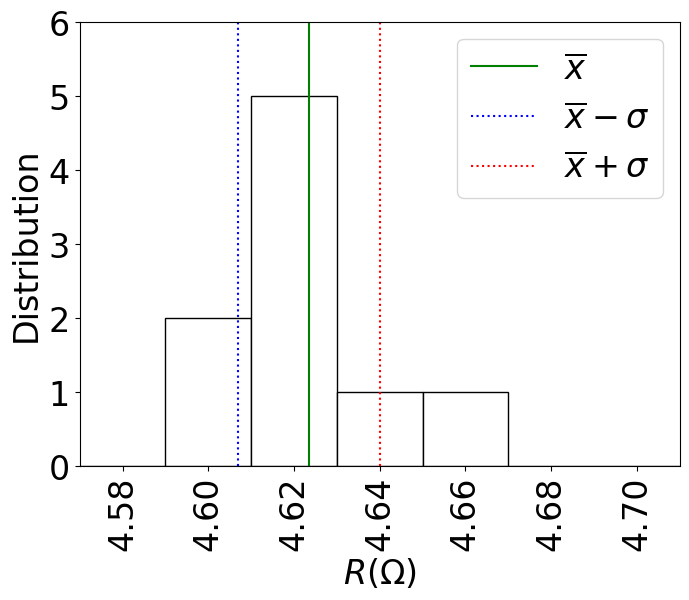

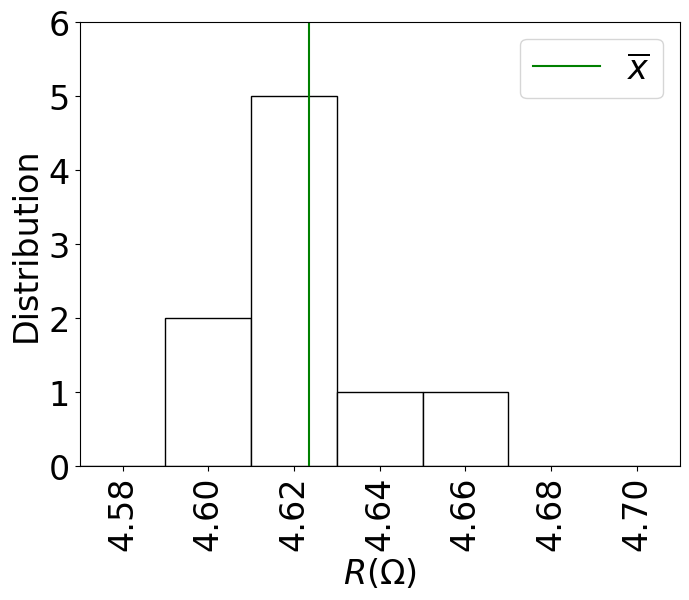

In [5]:
############################################
# ヒストグラムを描くデータ (図1.3)
Rdata = [4.605, 4.628, 4.652, 4.624, 4.603, 4.613, 4.649, 4.613, 4.625]
#
############################################
fig = GrfHist( Rdata, (4.57, 0.02, 4.70), x_label=r'$R (\Omega$)' )
#
# 図をpdfに保存
fig.savefig( FilePath + FileBaseName + '-01.pdf' )
#
############################################
fig = GrfHist( Rdata, (4.57, 0.02, 4.70), x_label=r'$R (\Omega$)',vline_sigma=False )
#
# 図をpdfに保存
fig.savefig( FilePath + FileBaseName + '-01a.pdf' )

# 図1.4のヒストグラムのデータを用意し、Excelファイルに出力する。

In [6]:
############################################
# 図1.4 のデータを用意し、Excelファイルに
# 出力する
#
R_mean  = 4.6278
R_sigma = 0.0247
#
R_m100   = np.round( np.random.normal( loc=R_mean, scale=R_sigma, size=100),   4)
df_R_m100 = pd.DataFrame( np.transpose( R_m100 ), columns=['R_m100'])
df_R_m100.to_excel(   FilePath + FileBaseName + '-R-m00100.xlsx', index=False, header=False)
#
R_m10000 = np.round( np.random.normal( loc=R_mean, scale=R_sigma, size=10000), 4)
df_R_m10000 = pd.DataFrame( np.transpose( R_m10000 ), columns=['R_m10000'])
df_R_m10000.to_excel( FilePath + FileBaseName + '-R-m10000.xlsx', index=False, header=False)

# 100回測定のデータを読み込み、ヒストグラムを描く

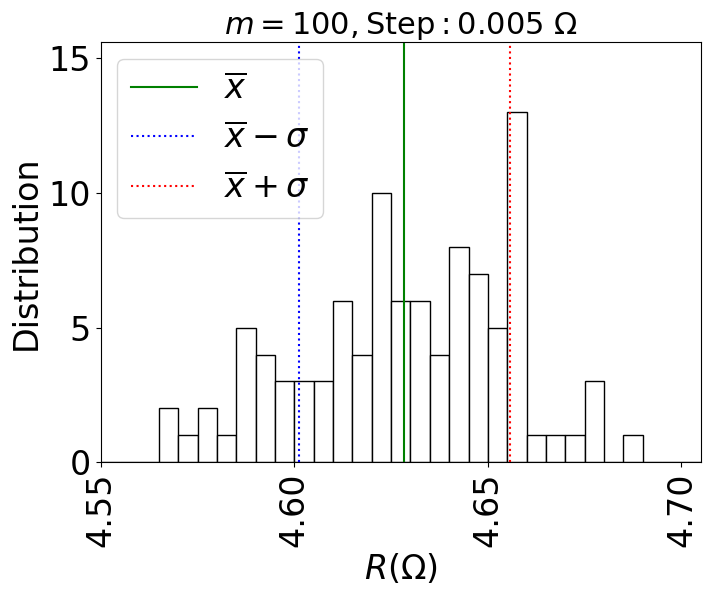

In [7]:
############################################
# Excelファイルからデータを読み込み、arrayに
# 変換するする
#
df_Rdata = pd.read_excel(FilePath + FileBaseName + '-R-m00100.xlsx', header=None )
#
Rdata = np.array( df_Rdata[0] )
Rdata_mean = np.mean( Rdata )
Rdata_std  = np.std( Rdata )
############################################
fig = GrfHist( Rdata, (4.55, 0.005, 4.70), x_label=r'$R (\Omega$)', title=r'$m=100, {\rm Step}: 0.005~\Omega$' )
#
# 図をpdfに保存
fig.savefig( FilePath + FileBaseName + '-R-m00100.pdf' )

# 10000回測定のデータを読み込み、ヒストグラムを描く

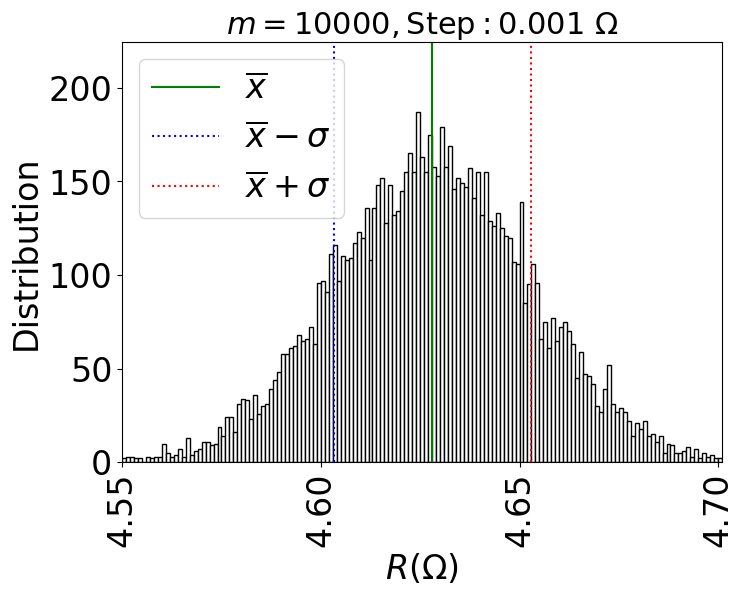

In [8]:
############################################
# Excelファイルからデータを読み込み、arrayに
# 変換するする
#
df_Rdata = pd.read_excel(FilePath + FileBaseName + '-R-m10000.xlsx', header=None )
#
Rdata = np.array( df_Rdata[0] )
Rdata_mean = np.mean( Rdata )
Rdata_std  = np.std( Rdata )
############################################
fig = GrfHist( Rdata, (4.55, 0.001, 4.70), x_label=r'$R (\Omega$)', title=r'$m=10000, {\rm Step}: 0.001~\Omega$' )
#
# 図をpdfに保存
fig.savefig( FilePath + FileBaseName + '-R-m10000.pdf' )